In [ ]:
"""
    face_of = {corner: n for n, face in enumerate(self.faces())
                for corner in face}

    # Create the edges, labeled with crossing and sign.
    edges = []
    for c in self.crossings:
        edges.append((face_of[CrossingStrand(c, 0)],
                        face_of[CrossingStrand(c, 2)],
                        -1))
        edges.append((face_of[CrossingStrand(c, 1)],
                        face_of[CrossingStrand(c, 3)],
                        1))


    # Build the graph.
    G = graph.Graph(edges, multiedges=True)
    components = G.connected_components()
    if len(components) > 2:
        raise ValueError('The link diagram is split.')
    return G.subgraph(components[0]), G.subgraph(components[1])
    #return edges
    #return G.subgraph(components[1])
    """

In [ ]:
def torientation(self):
        r"""
        Return the orientation of the crossings of the link diagram
        of ``self``.

        EXAMPLES::

            sage: L = Link([[1, 4, 5, 2], [3, 5, 6, 7], [4, 8, 9, 6], [7, 9, 10, 11], [8, 1, 13, 10], [11, 13, 2, 3]])
            sage: L.orientation()
            [-1, 1, -1, 1, -1, 1]
            sage: L = Link([[1, 7, 2, 6], [7, 3, 8, 2], [3, 11, 4, 10], [11, 5, 12, 4], [14, 5, 1, 6], [13, 9, 14, 8], [12, 9, 13, 10]])
            sage: L.orientation()
            [-1, -1, -1, -1, 1, -1, 1]
            sage: L = Link([[1, 2, 3, 3], [2, 4, 5, 5], [4, 1, 7, 7]])
            sage: L.orientation()
            [-1, -1, -1]
        """
        directions = self._directions_of_edges()[0]
        orientation = []
        for C in self.pd_code():
            if C[0] == C[1] or C[2] == C[3]:
                orientation.append(-1)
            elif C[1] == C[2] or C[0] == C[3]:
                orientation.append(1)
            elif directions[C[1]] == C:
                orientation.append(-1)
            else:
                orientation.append(1)
        return orientation


In [14]:
K = Knots().from_table(8,20)
dowker = K.dowker_notation()
signs = []
for DT in dowker:
    if DT[0] % 2 == 0 and DT[1] % 2 == 0 or DT[1] - DT[0] == 1:
        print(DT, +1)
        signs.append(+1)
    else:
        print(DT, -1)
        signs.append(-1)
print(signs)

(2, 1) -1
(5, 4) -1
(7, 6) -1
(9, 3) -1
(8, 10) 1
(12, 13) 1
(14, 15) 1
(17, 11) -1
[-1, -1, -1, -1, 1, 1, 1, -1]


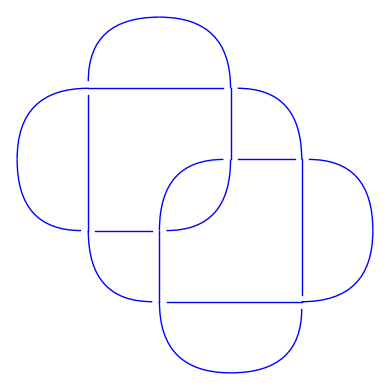

[[2, 1, 4, 5], [5, 4, 6, 7], [7, 6, 8, 9], [3, 9, 10, 11], [10, 8, 12, 13], [13, 12, 14, 15], [15, 14, 1, 17], [11, 17, 2, 3]]
(2, 1) -1
(5, 4) -1
(7, 6) -1
(3, 9) -1
(10, 8) 1
(13, 12) -1
(15, 14) -1
(11, 17) -1
[-1, -1, -1, -1, 1, -1, -1, -1]


In [7]:
K = Knots().from_table(8,19)
K.plot().show()
dowker = K.dowker_notation()
print(K.pd_code())

signs = []
for DT in dowker:
    if DT[0] % 2 == 0 and DT[1] % 2 == 0 or DT[1] - DT[0] == 1:
        print(DT, +1)
        signs.append(+1)
    else:
        print(DT, -1)
        signs.append(-1)
print(signs)

In [31]:
def sage_pd_code(link):
    pd = link.PD_code()
    return [[element + 1 for element in tup] for tup in pd]

def abs_regions(link):
    regions = link.regions()
    return [[abs(element) for element in reg] for reg in regions]

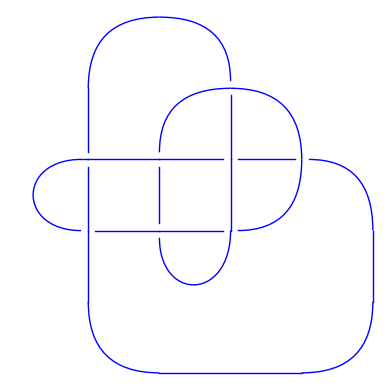

[[16, 7, 1, 8], [1, 12, 2, 13], [9, 2, 10, 3], [14, 3, 15, 4], [4, 15, 5, 16], [10, 6, 11, 5], [6, 12, 7, 11], [13, 9, 14, 8]]


[[16, 7, 11, 5],
 [15, 5, 10, 3],
 [14, 3, 9],
 [13, 9, 2],
 [12, 2, 10, 6],
 [11, 6],
 [8, 13, 1],
 [7, 1, 12],
 [4, 15],
 [4, 14, 8, 16]]

In [32]:
import snappy
L = snappy.Link('8_20')
pd = sage_pd_code(L)
K = Link(pd)
K.plot().show()
print(pd)
K.dowker_notation()
abs_regions(K)

In [35]:
face_of = {corner: n for n, region in enumerate(abs_regions(K))
                for corner in region}
print(face_of)

{16: 9, 7: 7, 11: 5, 5: 1, 15: 8, 10: 4, 3: 2, 14: 9, 9: 3, 13: 6, 2: 4, 12: 7, 6: 5, 8: 9, 1: 7, 4: 9}
